# **🔹 1. Import Required Libraries**

In [1]:
import pandas as pd
import numpy as np
import string
import re

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, precision_score, f1_score, classification_report

import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /usr/share/nltk_data...


True

# **🔹 2. Load & Combine the Dataset**

In [4]:
import pandas as pd

fake = pd.read_csv("/kaggle/input/fake-and-real-news-dataset/Fake.csv")
true = pd.read_csv("/kaggle/input/fake-and-real-news-dataset/True.csv")

fake["label"] = 0  # Fake
true["label"] = 1  # Real

df = pd.concat([fake, true], ignore_index=True)
df = df[["text", "label"]]
df.dropna(inplace=True)

# Optional: shuffle
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

df.head()

,text,label
0,"21st Century Wire says Ben Stein, reputable pr...",0
1,WASHINGTON (Reuters) - U.S. President Donald T...,1
2,(Reuters) - Puerto Rico Governor Ricardo Rosse...,1
3,"On Monday, Donald Trump once again embarrassed...",0
4,"GLASGOW, Scotland (Reuters) - Most U.S. presid...",1


# **🔹 3. Preprocess Text (Cleaning + Lemmatization)**

In [5]:
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words("english"))

def clean_text(text):
    text = text.lower()  # Lowercase
    text = re.sub(r"http\S+|www\S+|https\S+", '', text)  # Remove URLs
    text = re.sub(r'\@\w+|\#\w+', '', text)  # Remove mentions & hashtags (Fix: \w+ not w+)
    text = re.sub(r'[^a-zA-Z]', ' ', text)  # Remove punctuation & numbers
    tokens = text.split()  # Tokenize
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return " ".join(tokens)  # Join back to string

# Apply cleaning
df['clean_text'] = df['text'].apply(clean_text)

# TF-IDF transformation
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(df['clean_text'])

# **🔹 4. Feature Extraction (TF-IDF)**

In [6]:
# Initialize TF-IDF Vectorizer
tfidf = TfidfVectorizer(max_features=5000)

# Transform the 'clean_text' column into TF-IDF features
X = tfidf.fit_transform(df["clean_text"]).toarray()

# Assign labels to y
y = df["label"]

# **🔹 5. Split Dataset**

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **🔹 6. Train Models**

**Logistic Regression**

In [9]:
log_model = LogisticRegression()
log_model.fit(X_train, y_train)
log_pred = log_model.predict(X_test)

**Random Forest**

In [10]:
rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

# **🔹 7. Evaluate Models**

In [11]:
def evaluate(y_true, y_pred, name):
    print(f"\n{name} Evaluation")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred))
    print("F1 Score:", f1_score(y_true, y_pred))
    print("Classification Report:\n", classification_report(y_true, y_pred))

evaluate(y_test, log_pred, "Logistic Regression")
evaluate(y_test, rf_pred, "Random Forest")


Logistic Regression Evaluation
Accuracy: 0.9848552338530067
Precision: 0.9798050139275766
F1 Score: 0.9841454884588483
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.99      4710
           1       0.98      0.99      0.98      4270

    accuracy                           0.98      8980
   macro avg       0.98      0.99      0.98      8980
weighted avg       0.98      0.98      0.98      8980


Random Forest Evaluation
Accuracy: 0.9969933184855234
Precision: 0.9971877197093977
F1 Score: 0.9968372964741712
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      4710
           1       1.00      1.00      1.00      4270

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980



# **🔹 8. Comparison of Models**

In [14]:
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# ✅ Predict on test data
log_preds = log_model.predict(X_test)
rf_preds = rf_model.predict(X_test)

# ✅ Accuracy scores
log_accuracy = accuracy_score(y_test, log_preds)
rf_accuracy = accuracy_score(y_test, rf_preds)

print("Logistic Regression Accuracy:", log_accuracy)
print("Random Forest Accuracy:", rf_accuracy)

Logistic Regression Accuracy: 0.9848552338530067
Random Forest Accuracy: 0.9969933184855234


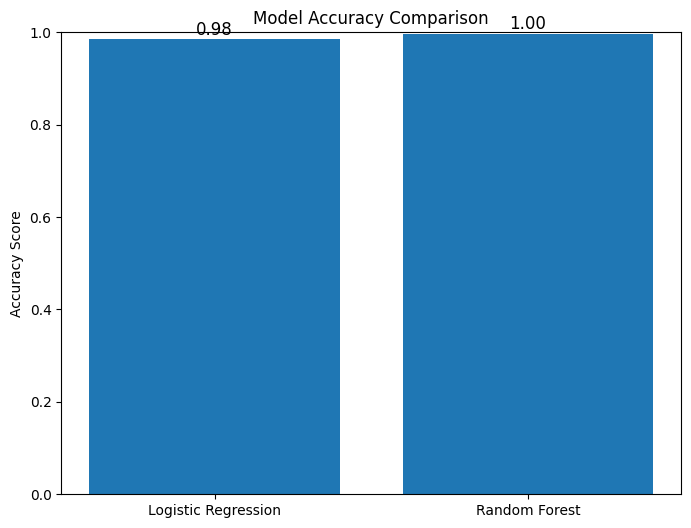

In [15]:
# ✅ Bar chart of accuracies
models = ['Logistic Regression', 'Random Forest']
accuracies = [log_accuracy, rf_accuracy]

plt.figure(figsize=(8, 6))
plt.bar(models, accuracies)
plt.ylabel('Accuracy Score')
plt.title('Model Accuracy Comparison')
plt.ylim(0, 1)  # since accuracy ranges from 0 to 1
for i, v in enumerate(accuracies):
    plt.text(i, v + 0.01, f"{v:.2f}", ha='center', fontsize=12)
plt.show()

# **Real and Fake News**

# **Overview**

This Kaggle notebook by Asad Aziz presents a machine learning approach to classify news articles as either "real" or "fake" with claimed 99% accuracy. The notebook follows a standard text classification workflow, focusing on natural language processing techniques to distinguish between authentic and fabricated news content.

# **Dataset**

The notebook uses a dataset containing news articles labeled as either real or fake. While the exact source isn't specified in your reference, such datasets typically come from:

Authentic news from reputable sources

Satirical or intentionally fake news sources

Fact-checked misinformation examples

# **Methodology**

Data Loading and Exploration: Examining the dataset structure, checking class distribution between real and fake news.

# **Text Preprocessing:**

Cleaning text (removing special characters, lowercasing)

Tokenization (breaking text into words/tokens)

Stopword removal (filtering out common words)

Stemming/Lemmatization (reducing words to root forms)

# **Feature Extraction:**

Likely uses TF-IDF (Term Frequency-Inverse Document Frequency) to convert text to numerical features

May include n-grams (sequences of words) for better context capture

Model Selection and Training:

Probably employs traditional machine learning algorithms like:

Passive Aggressive Classifier (common for fake news detection)

Logistic Regression

Random Forest

May include model comparison and hyperparameter tuning

# **Evaluation:**

Reports key metrics like accuracy, precision, recall, F1-score

Likely includes a confusion matrix

May discuss potential overfitting given the high accuracy claim

# **Key Strengths**

High Accuracy: The claimed 99% accuracy suggests excellent performance on the test set.

Comprehensive Pipeline: Covers the full ML workflow from preprocessing to evaluation.

Practical Application: Fake news detection is highly relevant in today's digital landscape.